In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
df.shape

(50, 5)

In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


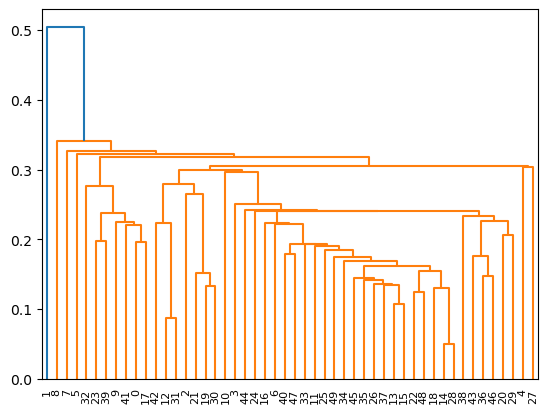

In [9]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
#creat dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='single'))


In [10]:
#create cluster
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
# save cluster for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
df['h_clusterid'] = hc.labels_
df

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


<Axes: xlabel='X', ylabel='Y'>

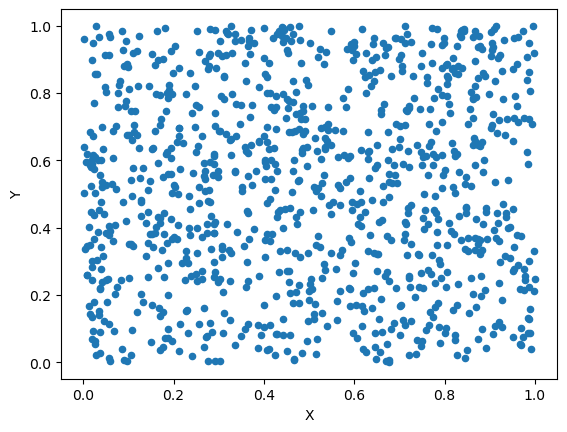

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#To create 1000 random data point
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X=X
df_xy.Y=Y
df_xy.plot(x="X",y="Y",kind="scatter")

In [12]:
X = np.random.uniform(0,1,1000)
X

array([5.80249273e-01, 7.86193469e-01, 2.23929053e-01, 8.39746026e-01,
       2.39685145e-01, 5.47935902e-01, 4.85139208e-01, 6.22733108e-01,
       8.73239006e-02, 1.18885276e-01, 5.90975172e-02, 5.30020222e-01,
       9.11136647e-01, 6.05032470e-01, 2.70367692e-01, 8.60379027e-01,
       3.18352550e-01, 1.11840772e-01, 8.71595669e-01, 4.50455883e-01,
       4.92154255e-01, 2.33152782e-01, 2.81079028e-01, 9.32777242e-01,
       1.84526868e-01, 5.60317208e-01, 9.53244053e-01, 9.38727253e-01,
       7.37958771e-01, 8.40509675e-01, 8.22747475e-01, 9.74379139e-02,
       3.95422042e-02, 2.65098057e-01, 2.70072769e-01, 4.74768153e-02,
       6.14011159e-01, 1.22218566e-02, 7.65985552e-01, 1.75726381e-02,
       9.10716207e-01, 7.32024964e-01, 9.60227209e-01, 9.83606175e-01,
       4.62782595e-01, 9.89796214e-01, 9.15489419e-01, 5.82097892e-01,
       1.32765523e-01, 7.67250775e-01, 6.14280644e-01, 7.87238838e-01,
       7.39448777e-01, 6.43426016e-02, 8.28303183e-01, 3.16786710e-01,
      

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='X', ylabel='Y'>

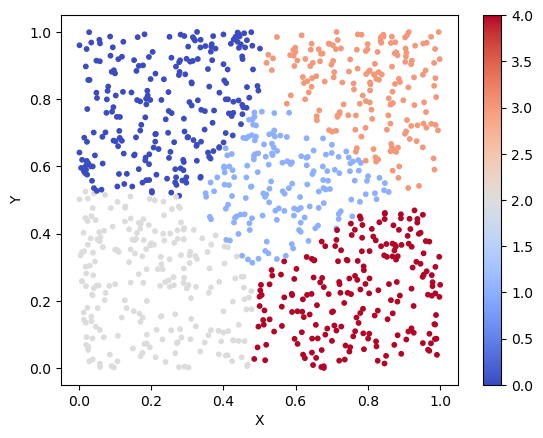

In [13]:
model1 = KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X",y="Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='X', ylabel='Y'>

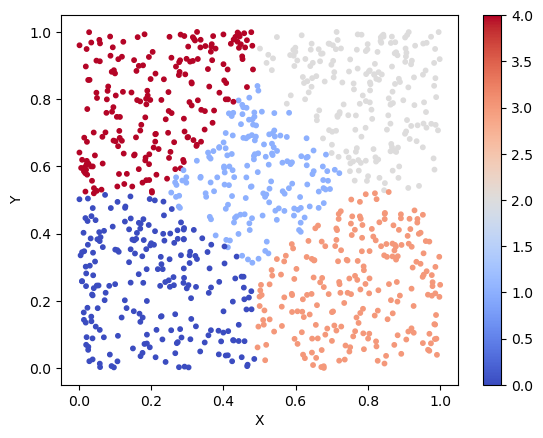

In [14]:
model1 = KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X",y="Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [17]:
import warnings
warnings.filterwarnings('ignore')

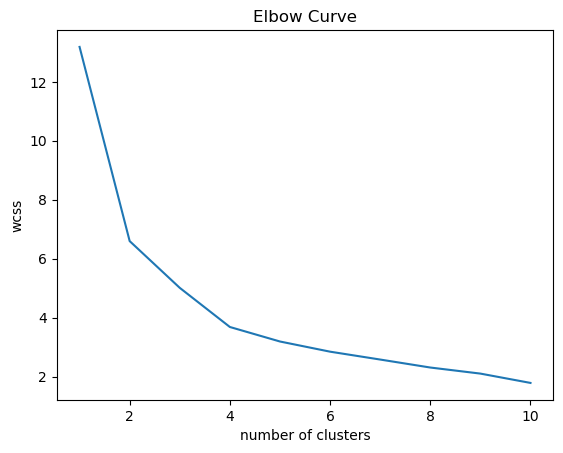

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [20]:
# selected 5 clusters from the above scree plot which is optimum number of clusters
model = KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_
md=pd.Series(model.labels_)
df['clust'] = md
df


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clust
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,1,2
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,0,3


In [21]:
df.iloc[:,1:5].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500
